In [50]:
import numpy as np
import pickle
from collections import deque
import heapq
from queue import PriorityQueue
import math
# General Notes:
# - Update the provided file name (code_<RollNumber>.py) as per the instructions.
# - Do not change the function name, number of parameters or the sequence of parameters.
# - The expected output for each function is a path (list of node names)
# - Ensure that the returned path includes both the start node and the goal node, in the correct order.
# - If no valid path exists between the start and goal nodes, the function should return None.

# To precompte the matrix that stores the reachable nodes from each node
reachable_global=[]
# Algorithm: Get Reachable Nodes from each node using bfs at all nodes
def get_reachable(adj_matrix):
    # Initialize the reachable matrix
    size = len(adj_matrix)
    reachable = np.zeros((size, size), dtype=bool)
    # Iterate over the nodes in the graph
    for i in range(size):
        # Initialize the frontier and visited set
        frontier = deque([i])
        visited = set()
        # Loop until the frontier is empty
        while frontier:
            # Get the current node from the frontier
            current = frontier.popleft()
            visited.add(current)
            # Update the reachable matrix
            reachable[i][current] = True
            # Iterate over the neighbors of the current node
            for neighbor, connected in enumerate(adj_matrix[current]):
                if connected and neighbor not in visited:
                    frontier.append(neighbor)

    return reachable

# Algorithm: Iterative Deepening Search (IDS)

# Input:
#   - adj_matrix: Adjacency matrix representing the graph.
#   - start_node: The starting node in the graph.
#   - goal_node: The target node in the graph.

# Return:
#   - A list of node names representing the path from the start_node to the goal_node.
#   - If no path exists, the function should return None.

# Sample Test Cases:

#   Test Case 1:
#     - Start node: 1, Goal node: 2
#     - Return: [1, 7, 6, 2]

#   Test Case 2:
#     - Start node: 5, Goal node: 12
#     - Return: [5, 97, 98, 12]

#   Test Case 3:
#     - Start node: 12, Goal node: 49
#     - Return: None

#   Test Case 4:
#     - Start node: 4, Goal node: 12
#     - Return: [4, 6, 2, 9, 8, 5, 97, 98, 12]

# def get_ids_path(adj_matrix, start_node, goal_node):

#   return []



# Iterative Deepening Search Algorithm
def get_ids_path(adj_matrix, start_node, goal_node):
    # check if the goal node is reachable from the start node
    if(start_node==goal_node):
        return [start_node]
    global reachable_global
    if (len(reachable_global)==0):
        reachable_global=get_reachable(adj_matrix)
    if (reachable_global[start_node][goal_node]==False):
        return None
    # depth limited search
    def depth_limited_search(c_n, goal_node, depth, path_visited, path):
        # Check if the current node is the goal node
        if depth == 0 and c_n == goal_node:
            path.append(c_n)
            return True
        # Check if the depth is greater than 0
        if depth > 0:
            # Add the current node to the visited set and the path
            path_visited.add(c_n)
            path.append(c_n)
            # Iterate over the neighbors of the current node
            for adj, c in enumerate(adj_matrix[c_n]):
                # Check if the node is connected and not visited
                if c and adj not in path_visited:
                    if depth_limited_search(adj, goal_node, depth - 1, path_visited, path):
                        return True
            # Remove the current node from the path and the visited set
            path.pop()
            path_visited.remove(c_n)
        return False
    # Iterative deepening search
    def iterative_deepening_search(start_node, goal_node):
        # Initialize the depth
        depth = 0
        # Loop until the goal node is reached
        for i in range(len(adj_matrix)):
            visited = set()
            path = []
            # Check if the goal node is reached
            if depth_limited_search(start_node, goal_node, depth, visited, path):
                return path
            depth += 1

    return iterative_deepening_search(start_node, goal_node)






# Algorithm: Bi-Directional Search

# Input:
#   - adj_matrix: Adjacency matrix representing the graph.
#   - start_node: The starting node in the graph.
#   - goal_node: The target node in the graph.

# Return:
#   - A list of node names representing the path from the start_node to the goal_node.
#   - If no path exists, the function should return None.

# Sample Test Cases:

#   Test Case 1:
#     - Start node: 1, Goal node: 2
#     - Return: [1, 7, 6, 2]

#   Test Case 2:
#     - Start node: 5, Goal node: 12
#     - Return: [5, 97, 98, 12]

#   Test Case 3:
#     - Start node: 12, Goal node: 49
#     - Return: None

#   Test Case 4:
#     - Start node: 4, Goal node: 12
#     - Return: [4, 6, 2, 9, 8, 5, 97, 98, 12]

# Backtrack function to get the path
def backtrack(forward_visited, backward_visited, point_of_contact):
    # Backtrack from the meeting node to get the path
    path = []
    point_of_contact1 = point_of_contact
    while point_of_contact is not None:
        path.append(point_of_contact)
        point_of_contact = forward_visited[point_of_contact]
    path.reverse() 
    point_of_contact1 = backward_visited[point_of_contact1]
    while point_of_contact1 is not None:
        path.append(point_of_contact1)
        point_of_contact1 = backward_visited[point_of_contact1]
    if path[0] == path[-1]:
        path.pop()

    return path
def get_bidirectional_search_path(adj_matrix, start_node, goal_node):
    if(start_node==goal_node):
        return [start_node]
    # check if the goal node is reachable from the start node
    global reachable_global
    if (len(reachable_global)==0):
        reachable_global=get_reachable(adj_matrix)
    if (reachable_global[start_node][goal_node]==False):
        return None
    # Initialize the forward and backward frontiers and visited sets
    forward_frontier = deque([start_node])
    backward_frontier = deque([goal_node])
    f_v = {start_node: None}  
    b_v = {goal_node: None} 
    # Loop until the frontiers are empty 
    while forward_frontier and backward_frontier:
        # Check the size of the frontiers
        n = len(backward_frontier)
        # Iterate over the backward frontier
        for i in range(n):
            # Get the current node from the backward frontier
            current_backward = backward_frontier.popleft()
            # Check if the node is in the forward visited
            for adj, c in enumerate(adj_matrix[current_backward]):
                # Check if the node is connected
                if c and adj not in b_v:
                    b_v[adj] = current_backward
                    backward_frontier.append(adj)
                    # Check if the node is in the forward visited
                    if adj in f_v:
                        return backtrack(f_v, b_v, adj)
        # Iterate over the forward frontier
        n = len(forward_frontier)
        for i in range(n):
            # Get the current node from the forward frontier
            current_forward = forward_frontier.popleft()
            # Check if the node is in the backward visited
            for adj, c in enumerate(adj_matrix[current_forward]):
                # Check if the node is connected
                if c and adj not in f_v:
                    # Update the forward visited and add the node to the frontier
                    f_v[adj] = current_forward
                    forward_frontier.append(adj)
                    # Check if the node is in the backward visited
                    if adj in b_v:
                        return backtrack(f_v, b_v, adj)


    return None  


# Algorithm: A* Search Algorithm

# Input:
#   - adj_matrix: Adjacency matrix representing the graph.
#   - node_attributes: Dictionary of node attributes containing x, y coordinates for heuristic calculations.
#   - start_node: The starting node in the graph.
#   - goal_node: The target node in the graph.

# Return:
#   - A list of node names representing the path from the start_node to the goal_node.
#   - If no path exists, the function should return None.

# Sample Test Cases:

#   Test Case 1:
#     - Start node: 1, Goal node: 2
#     - Return: [1, 7, 6, 2]

#   Test Case 2:
#     - Start node: 5, Goal node: 12
#     - Return: [5, 97, 28, 10, 12]

#   Test Case 3:
#     - Start node: 12, Goal node: 49
#     - Return: None

#   Test Case 4:
#     - Start node: 4, Goal node: 12
#     - Return: [4, 6, 27, 9, 8, 5, 97, 28, 10, 12]

# heuristics
def heuristic(node1, node2, node3, node_attributes):
    x1, y1 = node_attributes[node1]['x'], node_attributes[node1]['y']
    x2, y2 = node_attributes[node2]['x'], node_attributes[node2]['y']
    x3, y3 = node_attributes[node3]['x'], node_attributes[node3]['y']
    return (((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5)  + (((x3 - x1) ** 2 + (y3 - y1) ** 2) ** 0.5)
# Backtrack function to get the path
def backtrack2(previous_nodes, goal_node):
    path = []
    curr = goal_node
    while curr is not None:
        path.append(curr)
        curr = previous_nodes[curr]
    path.reverse()  # Reverse to get the correct order
    return path
# A* search algorithm
def get_astar_search_path(adj_matrix, node_attributes, start_node, goal_node):
    # check if the goal node is reachable from the start node
    if(start_node==goal_node):
        return [start_node]
    global reachable_global
    if (len(reachable_global)==0):
        reachable_global=get_reachable(adj_matrix)
    if (reachable_global[start_node][goal_node]==False):
        return None
    # Initialize the g and f values for the nodes
    num_nodes = len(adj_matrix)
    g = {node: 1e15 for node in range(num_nodes)}  
    g[start_node] = 0
    f= {node: 1e15 for node in range(num_nodes)}  
    f[start_node] = heuristic(start_node, goal_node, start_node, node_attributes)
    # Initialize the frontier, visited, and previous nodes
    frontier = [(f[start_node], start_node)]  
    vis = set() 
    previous_nodes = {node: None for node in range(num_nodes)}  
    # Loop until the frontier is empty
    while frontier:
        # Get the node with the minimum f value
        curr_f, curr_node = heapq.heappop(frontier) 
        # Check if the current node is the goal node
        if curr_node == goal_node:
            return backtrack2(previous_nodes, goal_node)
        # Check if the node is visited
        if curr_node in vis:
            continue  
        # Add the node to the visited set
        vis.add(curr_node)
        # Iterate over the neighbors of the current node
        for adj, cost in enumerate(adj_matrix[curr_node]):
            # Check if the node is connected
            if cost: 
                # Calculate the tentative g value
                tg = g[curr_node] + cost 
                # Update the g value if it is less than the previous value
                if tg < g[adj]:  
                    # Update the g value and the previous node
                    previous_nodes[adj] = curr_node
                    g[adj] = tg
                    # Calculate the f value
                    f[adj] = g[adj] + heuristic(adj, goal_node, start_node, node_attributes)
                    # Add the node to the frontier
                    if adj not in vis:
                        heapq.heappush(frontier, (f[adj], adj))

    return None  


# Algorithm: Bi-Directional Heuristic Search

# Input:
#   - adj_matrix: Adjacency matrix representing the graph.
#   - node_attributes: Dictionary of node attributes containing x, y coordinates for heuristic calculations.
#   - start_node: The starting node in the graph.
#   - goal_node: The target node in the graph.

# Return:
#   - A list of node names representing the path from the start_node to the goal_node.
#   - If no path exists, the function should return None.

# Sample Test Cases:

#   Test Case 1:
#     - Start node: 1, Goal node: 2
#     - Return: [1, 7, 6, 2]

#   Test Case 2:
#     - Start node: 5, Goal node: 12
#     - Return: [5, 97, 98, 12]

#   Test Case 3:
#     - Start node: 12, Goal node: 49
#     - Return: None

#   Test Case 4:
#     - Start node: 4, Goal node: 12
#     - Return: [4, 34, 33, 11, 32, 31, 3, 5, 97, 28, 10, 12]


def backtrack3(parents_s, parents_t, meet_node):
    # Reconstruct the path from the parents
    path_f= []
    node = meet_node
    while node is not None:
        path_f.append(node)
        node = parents_s.get(node)

    path_f.reverse()

    path_b = []
    node = parents_t.get(meet_node)
    while node is not None:
        path_b.append(node)
        node = parents_t.get(node)
    return path_f + path_b
def check_none(start_node, goal_node, adj_matrix):
    global reachable_global
    if start_node == goal_node:
        return [start_node]
    if (len(reachable_global)==0):
        reachable_global=get_reachable(adj_matrix)
    if (reachable_global[start_node][goal_node]==False):
        return None
def define_data_structures(start_node, goal_node):

    # Parent pointers for path reconstruction
    parents_s = {start_node: None}
    parents_d = {goal_node: None}
    
    # Initialize distance maps
    ds = {start_node: 0}
    dg = {goal_node: 0}

    # Visited sets
    vis_f = set()
    vis_b = set()
    
    # Initialize the frontier
    f_frontier = PriorityQueue()
    b_frontier = PriorityQueue()
    b_frontier.put((0, goal_node)) 
    f_frontier.put((0, start_node)) 
    return f_frontier, b_frontier, ds, dg, parents_s, parents_d, vis_f, vis_b
def f_score( dist , node , goal , start , node_attributes ):
    return dist + heuristic(node, goal, start, node_attributes)
# def add_in_frontier(fron)
def get_bidirectional_heuristic_search_path(adj_matrix, node_attributes, start_node, goal_node):
    # check if the goal node is reachable from the start node
    check_none(start_node, goal_node, adj_matrix)
    # Initialize the data structures
    f_frontier, b_frontier, ds, dg, parents_s, parents_t, vis_f, vis_b = define_data_structures(start_node, goal_node)
    # Best distance found
    m_cost = 1e15  # best distance from start to goal found so far
    point_of_contact = None
    # Main loop
    while not (b_frontier.empty() or f_frontier.empty()):
        # Forward search step
        if f_frontier.empty()==False:
            # Get the node with the minimum cost
            c, vs = f_frontier.get()
            # Check if the node is in the backward frontier
            if vs in vis_b:
                flag=1
                # Calculate the total cost
                d_st= ds[vs]
                d_go= dg[vs]
                total_cost = d_st + d_go
                # Update the minimum cost and the point of contact
                if total_cost >= m_cost:
                    pass
                else :
                    m_cost = total_cost
                    point_of_contact = vs
             # Check if the node is visited       
            if vs not in vis_f and c <= m_cost :

                vis_f.add(vs)
                for w, cost in enumerate(adj_matrix[vs]):
                    # Only consider directed edges in forward search
                    if cost==0 : 
                        continue
                    if cost != 0: 
                        dsv=ds[vs] # There's an edge from vs to w
                        new_dist =  dsv+ cost
                        # Update the distance if a shorter path is found
                        if not (w in ds and new_dist >= ds[w]):
                            # Update the distance and the parent
                            parents_s[w] = vs
                            ds[w] = new_dist
                            # Calculate the cost and add the node to the frontier
                            f_cost =  f_score(new_dist, w, goal_node, start_node, node_attributes)
                            f_frontier.put((f_cost, w))

        # Backward search step
        if b_frontier.empty()==False:
            # Get the node with the minimum cost
            c, vt = b_frontier.get()

            # Check if the node is in the forward frontier
            if vt in vis_f:
                flag = 1
                dst=ds[vt]
                dgo=dg[vt]
                total_cost = dst+dgo
                # Update the minimum cost and the point of contact
                if total_cost >= m_cost:
                    pass
                else:
                    m_cost = total_cost
                    point_of_contact = vt
            # Check if the node is visited
            if vt not in vis_b and c <= m_cost :
                vis_b.add(vt)
                # Iterate over the neighbors of the current node
                for w, cost in enumerate(adj_matrix[:, vt]): 
                 
                    if cost== 0 :
                        pass 
                    if cost != 0: 
                        dgt=dg[vt]
                        new_dist =dgt  + cost
                        if w not in dg or new_dist < dg[w]:
                            parents_t[w] = vt
                            dg[w] = new_dist
                            
                            b_cost = f_score(new_dist, w, start_node, goal_node, node_attributes)
                            b_frontier.put((b_cost, w))

    if point_of_contact==None:
        return None

    else:
        path_f= []
        node = point_of_contact
        while node is not None:
            path_f.append(node)
            node = parents_s.get(node)
        path_f.reverse()
        path_b = []
        node = parents_t.get(point_of_contact)
        while node is not None:
            path_b.append(node)
            node = parents_t.get(node)
        path_sum= path_f + path_b
        return path_sum
        # return None
# Bonus Problem
 
# Input:
# - adj_matrix: A 2D list or numpy array representing the adjacency matrix of the graph.

# Return:
# - A list of tuples where each tuple (u, v) represents an edge between nodes u and v.
#   These are the vulnerable roads whose removal would disconnect parts of the graph.

# Note:
# - The graph is undirected, so if an edge (u, v) is vulnerable, then (v, u) should not be repeated in the output list.
# - If the input graph has no vulnerable roads, return an empty list [].

def bonus_problem(adj_matrix):
  def convert_to_adj_list(adj_matrix):
        # Convert the adjacency matrix to adjacency list
        size = len(adj_matrix)
        adj_list = {i: [] for i in range(size)}
        # Iterate over the adjacency matrix to create the adjacency list
        for i, row in enumerate(adj_matrix):
            # Iterate over the row to get the neighbors
            for j, c in enumerate(row):
                if c:
                    # Add the edge to the adjacency list
                    if j not in adj_list[i]:
                        adj_list[i].append(j)
                    if i not in adj_list[j]:
                        adj_list[j].append(i)
        
        return adj_list
  def initialize_tarjan_data():
        # Initialize the data structures for Tarjan's algorithm
        visited = set()
        parent = {}
        low = {}
        disc = {}
        bridges = []
        time = 0
        return visited, parent, low, disc, bridges, time
# Helper functions for Tarjan's algorithm
  def update_low_value(node, neighbor, low, disc):
        low[node] = min(low[node], disc[neighbor])
# Check if the edge is a bridge
  def is_bridge(node, neighbor, low, disc):
        return low[neighbor] > disc[node]
# Tarjan's algorithm to find bridges in the graph
  def tarjan(node, parent_node, adj_list, visited, disc, low, parent, bridges, time):
        # add the current node to the visited set
        visited.add(node)
        # Initialize the discovery and low values for the current node
        low[node] = disc[node] = time
        time += 1
        # Iterate over the neighbors of the current node
        
        for neighbor in adj_list[node]:
            # Check if the neighbor is the parent node
            if neighbor == parent_node:
                continue
            # Check if the neighbor is not visited
            if neighbor not in visited:
                # Update the parent and call the function recursively
                parent[neighbor] = node
                # Update the discovery and low values
                time = tarjan(neighbor, node, adj_list, visited, disc, low, parent, bridges, time)
                # Update the low value
                low[node] = min(low[node], low[neighbor])
                # Check if the edge is a bridge
                if is_bridge(node, neighbor, low, disc):
                    bridges.append((node, neighbor))
            else:
                # Update the low value for the current node
                update_low_value(node, neighbor, low, disc)
        
        return time

  def find_bridges(adj_list):
        # Find the bridges in the graph using Tarjan's algorithm
        size = len(adj_list)
        # Initialize the data structures
        visited, parent, low, disc, bridges, time = initialize_tarjan_data()
        # Iterate over the nodes in the graph
        for node in adj_list:
            # Check if the node is not visited
            if node not in visited:
                parent[node] = None
                # Call the Tarjan's algorithm for the node
                time = tarjan(node, None, adj_list, visited, disc, low, parent, bridges, time)
        
        return bridges
# Convert the adjacency matrix to adjacency list
  adj_list = convert_to_adj_list(adj_matrix)
  # print(adj_list)
  bridges = find_bridges(adj_list)
  # bridges.append((len(bridges),0))
  return bridges


# if __name__ == "__main__":
#   adj_matrix = np.load('IIIT_Delhi.npy')
#   with open('IIIT_Delhi.pkl', 'rb') as f:
#     node_attributes = pickle.load(f)

#   start_node = int(input("Enter the start node: "))
#   end_node = int(input("Enter the end node: "))

#   print(f'Iterative Deepening Search Path: {get_ids_path(adj_matrix,start_node,end_node)}')
#   print(f'Bidirectional Search Path: {get_bidirectional_search_path(adj_matrix,start_node,end_node)}')
#   print(f'A* Path: {get_astar_search_path(adj_matrix,node_attributes,start_node,end_node)}')
#   print(f'Bidirectional Heuristic Search Path: {get_bidirectional_heuristic_search_path(adj_matrix,node_attributes,start_node,end_node)}')
#   print(f'Bonus Problem: {bonus_problem(adj_matrix)}')
# import tracemalloc
# import time
# import numpy as np
# import csv

# # Function to calculate path cost
# def calculate_path_cost(path, adj_matrix):
#     if path is None or len(path) < 2:
#         return None
#     total_cost = 0
#     for k in range(len(path) - 1):
#         total_cost += adj_matrix[path[k]][path[k + 1]]
#     return total_cost

# # Function to run the experiment for a single algorithm (without node attributes)
# def run_experiment(algorithm_name, algorithm_function, adj_matrix, reachable_global, iters):
#     # Initialize tracking variables
#     total_path_cost = 0
#     valid_paths_count = 0
    
#     # Start tracing memory usage
#     tracemalloc.start()
    
#     # Start global timer
#     global_start_time = time.time()
    
#     for i in range(iters):
#         for j in range(iters):
#             if i == j:
#                 continue
#             if reachable_global[i][j]:
#                 # Call the algorithm function and get the path
#                 path = algorithm_function(adj_matrix, i, j)
#                 path_cost = calculate_path_cost(path, adj_matrix)
#                 if path_cost is not None:
#                     total_path_cost += path_cost
#                     valid_paths_count += 1
    
#     # Stop global timer
#     global_end_time = time.time()
    
#     # Get global memory stats
#     current_memory, peak_memory = tracemalloc.get_traced_memory()
    
#     # Stop tracing memory
#     tracemalloc.stop()
    
#     # Calculate average path cost
#     avg_path_cost = total_path_cost / valid_paths_count if valid_paths_count > 0 else None
    
#     # Global statistics
#     total_time = global_end_time - global_start_time
#     total_space_current = current_memory
#     total_space_peak = peak_memory
    
#     # Log global stats
#     with open('algo_perf.csv', 'a', newline='') as csvfile:
#         csvwriter = csv.writer(csvfile)
#         # Write header for the first algorithm only
#         if csvfile.tell() == 0:
#             csvwriter.writerow([
#                 'Algorithm', 'Total Time (s)', 'Peak Memory (bytes)', 'Current Memory (bytes)', 'Average Path Cost'
#             ])
#         csvwriter.writerow([
#             algorithm_name, total_time, total_space_peak, total_space_current, avg_path_cost
#         ])

# Function to run the experiment for algorithms that use node attributes
# def run_experiment2(algorithm_name, algorithm_function, adj_matrix, reachable_global, iters, node_attributes):
#     # Initialize tracking variables
#     total_path_cost = 0
#     valid_paths_count = 0
    
#     # Start tracing memory usage
#     tracemalloc.start()
    
#     # Start global timer
#     global_start_time = time.time()
    
#     for i in range(iters):
#         for j in range(iters):
#             if i == j:
#                 continue
#             if reachable_global[i][j]:
#                 # Call the algorithm function and get the path
#                 path = algorithm_function(adj_matrix, node_attributes, i, j)
#                 path_cost = calculate_path_cost(path, adj_matrix)
#                 if path_cost is not None:
#                     total_path_cost += path_cost
#                     valid_paths_count += 1
    
#     # Stop global timer
#     global_end_time = time.time()
    
#     # Get global memory stats
#     current_memory, peak_memory = tracemalloc.get_traced_memory()
    
#     # Stop tracing memory
#     tracemalloc.stop()
    
#     # Calculate average path cost
#     avg_path_cost = total_path_cost / valid_paths_count if valid_paths_count > 0 else None
    
#     # Global statistics
#     total_time = global_end_time - global_start_time
#     total_space_current = current_memory
#     total_space_peak = peak_memory
    
#     # Log global stats
#     with open('algo_perf.csv', 'a', newline='') as csvfile:
#         csvwriter = csv.writer(csvfile)
#         # Write header for the first algorithm only
#         if csvfile.tell() == 0:
#             csvwriter.writerow([
#                 'Algorithm', 'Total Time (s)', 'Peak Memory (bytes)', 'Current Memory (bytes)', 'Average Path Cost'
#             ])
#         csvwriter.writerow([
#             algorithm_name, total_time, total_space_peak, total_space_current, avg_path_cost
#         ])


# iters = 125

# # Run experiments
# run_experiment2("A*", get_astar_search_path, adj_matrix, reachable_global, iters, node_attributes)
# run_experiment2("Bidirectional Heuristic", get_bidirectional_heuristic_search_path, adj_matrix, reachable_global, iters, node_attributes)
# run_experiment("IDS", get_ids_path, adj_matrix, reachable_global, iters)
# run_experiment("Bidirectional Search", get_bidirectional_search_path, adj_matrix, reachable_global, iters)

# # Print message when done
# print("Experiments completed and results saved to 'algo_perf.csv'.")

# if __name__ == "__main__":
#   adj_matrix = np.load('IIIT_Delhi.npy')
#   with open('IIIT_Delhi.pkl', 'rb') as f:
#     node_attributes = pickle.load(f)

#   start_node = int(input("Enter the start node: "))
#   end_node = int(input("Enter the end node: "))

#   print(f'Iterative Deepening Search Path: {get_ids_path(adj_matrix,start_node,end_node)}')
#   print(f'Bidirectional Search Path: {get_bidirectional_search_path(adj_matrix,start_node,end_node)}')
#   print(f'A* Path: {get_astar_search_path(adj_matrix,node_attributes,start_node,end_node)}')
#   print(f'Bidirectional Heuristic Search Path: {get_bidirectional_heuristic_search_path(adj_matrix,node_attributes,start_node,end_node)}')
#   print(f'Bonus Problem: {bonus_problem(adj_matrix)}')

In [52]:
# if __name__ == "__main__":
adj_matrix = np.load('IIIT_Delhi.npy')
with open('IIIT_Delhi.pkl', 'rb') as f:
    node_attributes = pickle.load(f)


In [53]:
# to get the reachable nodes from each node
global reachable_global
reachable_global= get_reachable(adj_matrix)
print(reachable_global)

[[ True False False ... False False False]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]
 [False  True  True ...  True  True  True]]


In [30]:
# import tracemalloc
# import time
# import numpy as np

# # Initialize lists to store time and space usage per iteration
# time_per_iteration_bidirectional = []
# space_per_iteration_bidirectional = []
# it=[]
# # Initialize global time and space trackers
# total_time_bidirectional = 0
# total_space_current_bidirectional = 0
# total_space_peak_bidirectional = 0

# # Start tracing memory usage
# tracemalloc.start()

# # Start global timer
# global_start_time_bidirectional = time.time()

# # Assuming reachable and adj_matrix are already defined 
# for i in range(125):
#     for j in range(125):
#         if i == j:
#             continue
#         if reachable_global[i][j]:
#             print(i,j)
#             it.append((i,j))
#             # Track time and memory usage for each iteration
#             iteration_start_time = time.time()
#             iteration_tracemalloc_start = tracemalloc.take_snapshot()
            
#             # Call the function to get the path (replace with your actual function)
#             get_bidirectional_search_path(adj_matrix, i, j)
            
#             # Record time taken for this iteration
#             iteration_time = time.time() - iteration_start_time
#             time_per_iteration_bidirectional.append(iteration_time)
            
#             # Take another snapshot to calculate memory used during this iteration
#             iteration_tracemalloc_end = tracemalloc.take_snapshot()
#             iteration_stats = iteration_tracemalloc_end.compare_to(iteration_tracemalloc_start, 'lineno')
            
#             # Get current memory usage and peak memory usage for this iteration
#             current_memory = sum(stat.size_diff for stat in iteration_stats)
#             space_per_iteration_bidirectional.append(current_memory)
        
# # Stop global timer
# global_end_time_bidirectional = time.time()

# # Get global memory stats
# current_bidirectional, peak_bidirectional = tracemalloc.get_traced_memory()

# # Stop tracing memory
# tracemalloc.stop()

# # Global statistics
# total_time = global_end_time_bidirectional - global_start_time_bidirectional
# total_space_current = current_bidirectional
# total_space_peak = peak_bidirectional

# # Print global time and memory statistics
# print(f"Total Time: {total_time} seconds")
# print(f"Total Memory Used: {total_space_current / 1024} KB")
# print(f"Peak Memory Usage: {total_space_peak / 1024} KB")

# # Optionally, print or log per-iteration time and space usage
# print(f"Average Time per Iteration: {np.mean(time_per_iteration_bidirectional)} seconds")
# print(f"Average Memory Used per Iteration: {np.mean(space_per_iteration_bidirectional) / 1024} KB")


In [31]:
# print(f"Total Time: {total_time} seconds")
# print(f"Total Memory Used: {total_space_current / 1024} KB")
# print(f"Peak Memory Usage: {total_space_peak / 1024} KB")

In [32]:
# import tracemalloc
# import time
# import numpy as np

# # Initialize lists to store time and space usage per iteration
# time_per_iteration_ids = []
# space_per_iteration_ids = []
# it = []

# # Initialize global time and space trackers
# total_time_ids = 0
# total_space_current_ids = 0
# total_space_peak_ids = 0

# # Start tracing memory usage
# tracemalloc.start()

# # Start global timer
# global_start_time_ids = time.time()

# # Assuming reachable and adj_matrix are already defined 
# for i in range(125):
#     for j in range(125):
#         if i == j:
#             continue
#         if reachable[i][j]:
#             print(i, j)
#             it.append((i, j))
            
#             # Track time and memory usage for each iteration
#             iteration_start_time = time.time()
#             iteration_tracemalloc_start = tracemalloc.take_snapshot()
            
#             # Call the function to get the path (replace with your actual function)
#             get_ids_path(adj_matrix, i, j)
            
#             # Record time taken for this iteration
#             iteration_time = time.time() - iteration_start_time
#             time_per_iteration_ids.append(iteration_time)
            
#             # Take another snapshot to calculate memory used during this iteration
#             iteration_tracemalloc_end = tracemalloc.take_snapshot()
#             iteration_stats = iteration_tracemalloc_end.compare_to(iteration_tracemalloc_start, 'lineno')
            
#             # Get current memory usage and peak memory usage for this iteration
#             current_memory = sum(stat.size_diff for stat in iteration_stats)
#             space_per_iteration_ids.append(current_memory)
        
# # Stop global timer
# global_end_time_ids = time.time()

# # Get global memory stats
# current_ids, peak_ids = tracemalloc.get_traced_memory()

# # Stop tracing memory
# tracemalloc.stop()

# # Global statistics
# total_time = global_end_time_ids - global_start_time_ids
# total_space_current = current_ids
# total_space_peak = peak_ids

# # Print global time and memory statistics
# print(f"Total Time: {total_time} seconds")
# print(f"Total Memory Used: {total_space_current / 1024} KB")
# print(f"Peak Memory Usage: {total_space_peak / 1024} KB")

# # Optionally, print or log per-iteration time and space usage
# print(f"Average Time per Iteration: {np.mean(time_per_iteration_ids)} seconds")
# print(f"Average Memory Used per Iteration: {np.mean(space_per_iteration_ids) / 1024} KB")


Experiments completed and results saved to 'algo_perf.csv'.


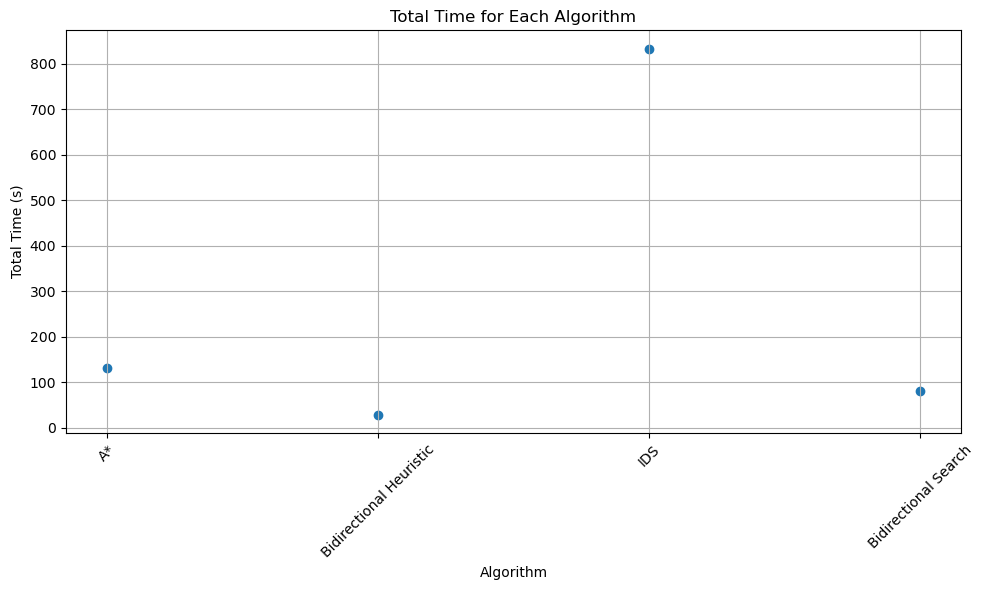

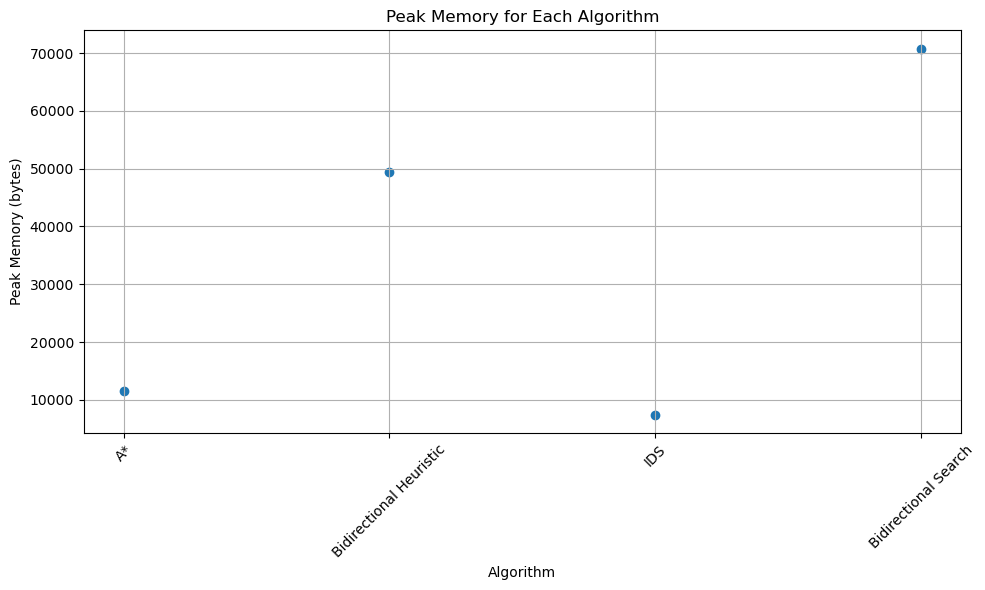

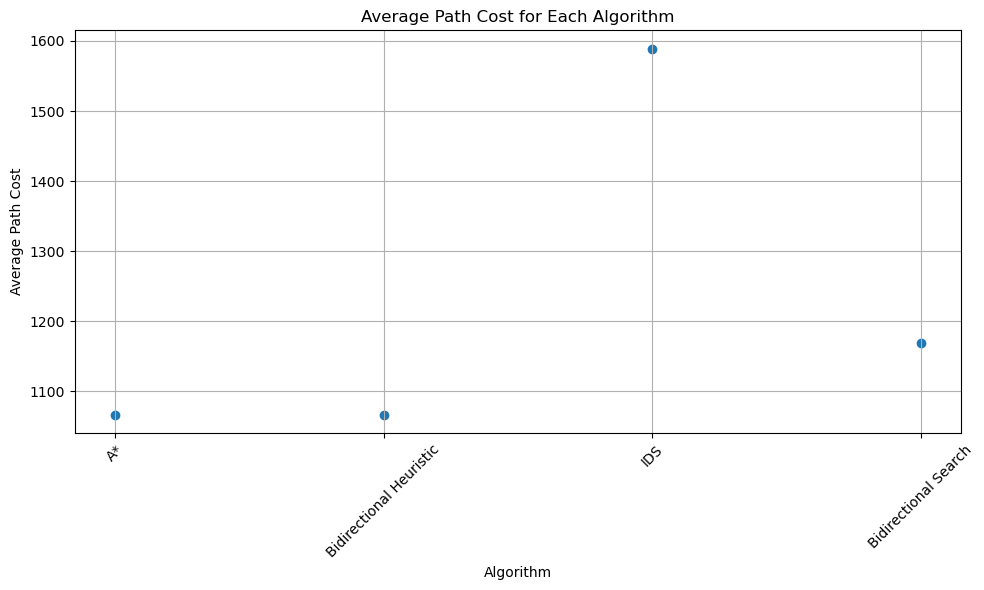

In [65]:
# read this algo_perf.csv file and plot the scatter plot for each metric 

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('algo_perf.csv')

# Plot the scatter plot for each metric

# Total Time
plt.figure(figsize=(10, 6))
plt.scatter(data['Algorithm'], data['Total Time (s)'])
plt.xlabel('Algorithm')
plt.ylabel('Total Time (s)')
plt.title('Total Time for Each Algorithm')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Peak Memory
plt.figure(figsize=(10, 6))
plt.scatter(data['Algorithm'], data['Peak Memory (bytes)'])
plt.xlabel('Algorithm')
plt.ylabel('Peak Memory (bytes)')
plt.title('Peak Memory for Each Algorithm')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Average Path Cost
plt.figure(figsize=(10, 6))
plt.scatter(data['Algorithm'], data['Average Path Cost'])
plt.xlabel('Algorithm')
plt.ylabel('Average Path Cost')
plt.title('Average Path Cost for Each Algorithm')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()





